Завдання.
## <font color='red'>Створити датасет на основі випадкових даних за допомогою **numpy.linspace** та провести на ньому лінійну регресію, використовуючи інструменти **Tensorflow**</font>

In [1]:
# Required libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generating random linear data.
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the ramdom linear data.
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

# Number of data points.
n = len(x)

In [3]:
# It can be used for variables solving problems.
# x = x.astype(np.float32)
# y = y.astype(np.float32)

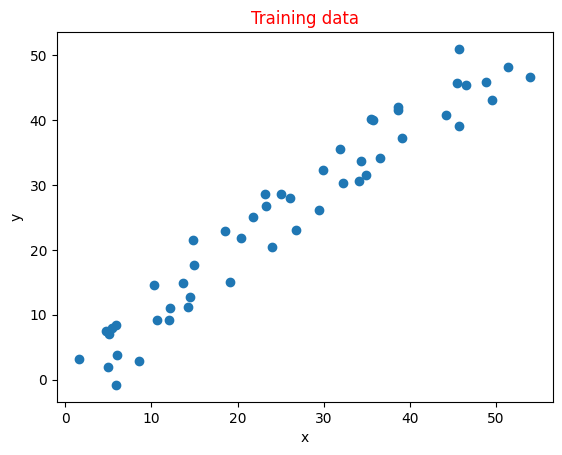

In [4]:
# Visualization of x, y values.
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data', color='red')
plt.show()

In [5]:
# The method disables eager execution.
tf.compat.v1.disable_eager_execution()

In [6]:
# Plot the Training Data.
X = tf.compat.v1.placeholder('float')
Y = tf.compat.v1.placeholder('float')

# X = tf.compat.v1.placeholder(tf.float32, name='X')
# Y = tf.compat.v1.placeholder(tf.float32, name='Y')

# Definition of our W (weight) and b (bias) using random values.
W = tf.Variable(np.random.randn(), name='W')
b = tf.Variable(np.random.randn(), name='b')


In [7]:
# Definition of our hyperparameters:

# Controls how much we are adjusting the weights of our network with respect the loss gradient.
learning_rate = 0.01

# How many iteration over samples.
training_epochs = 300

In [8]:
# Hypothesis:
# The relationship betweent x and y.
y_pred = tf.add(tf.multiply(X, W), b)

# MSE cost function:
# Determine the value of the weight and bias from the given dataset.
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2)) / (2 * n)

# Gradient Descent Optimizer:
# An algorithm that is used to find the optimized parameters.
optimizer_gradient = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global variables.
init = tf.compat.v1.global_variables_initializer()

In [9]:
# Starting the Tensorflow Session.
with tf.compat.v1.Session() as sess:
  # Initializing the Variables.
  sess.run(init)

  # Iterating through all epochs.
  for epoch in range(training_epochs):

    # Feeding each data point into the optimizer using Feed Dictionary.
    for (_x, _y) in zip(x, y):
      sess.run(optimizer_gradient, feed_dict = {X: _x, Y: _y})
      # Displaying the result after every 50 epochs.
      if (epoch + 1) % 50 == 0:

        # Calculating the cost a every epoch.
        c = sess.run(cost, feed_dict = {X: x, Y: y})
        print('Epoch =', (epoch + 1), '| cost =', c, '| weight =', sess.run(W), '| bias =', sess.run(b))

  # Storing necessary values to be used outside the Session.
  training_cost = sess.run(cost, feed_dict = {X: x, Y: y})
  weight = sess.run(W)
  bias = sess.run(b)

Epoch = 50 | cost = 8.530698 | weight = 0.9033088 | bias = 0.29126692
Epoch = 50 | cost = 8.70714 | weight = 0.9004545 | bias = 0.29069236
Epoch = 50 | cost = 9.208598 | weight = 0.89289606 | bias = 0.2894103
Epoch = 50 | cost = 9.371696 | weight = 0.8905885 | bias = 0.28902826
Epoch = 50 | cost = 9.212609 | weight = 0.89283633 | bias = 0.28946683
Epoch = 50 | cost = 9.8462 | weight = 0.88420427 | bias = 0.28846127
Epoch = 50 | cost = 9.6336 | weight = 0.8869948 | bias = 0.28904614
Epoch = 50 | cost = 9.720849 | weight = 0.8858344 | bias = 0.28893748
Epoch = 50 | cost = 9.488911 | weight = 0.8889457 | bias = 0.28951678
Epoch = 50 | cost = 9.247217 | weight = 0.89231884 | bias = 0.29009166
Epoch = 50 | cost = 9.548625 | weight = 0.8881216 | bias = 0.28974208
Epoch = 50 | cost = 8.818989 | weight = 0.8986891 | bias = 0.29076523
Epoch = 50 | cost = 8.86393 | weight = 0.8979943 | bias = 0.29070827
Epoch = 50 | cost = 8.953322 | weight = 0.8966307 | bias = 0.290614
Epoch = 50 | cost = 9.314

In [10]:
# Calculating and printing the prediction.
predictions = weight * x + bias
print('Training cost =', training_cost, '| Weight =', weight, '| bias =', bias, '\n')

Training cost = 8.043332 | Weight = 0.8877932 | bias = 1.0704262 



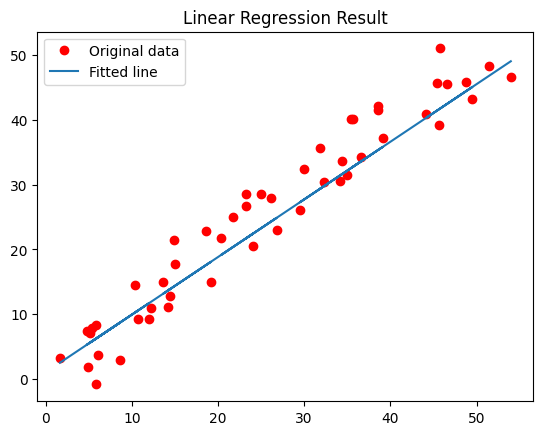

In [11]:
# Output of the prediction.

# Plotting the Results.
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()